### Notebook to download and preprocess data

#### 1. Download data

In [9]:
import sys
import importlib

# Ensure the data module path is in sys.path
data_module_path = "../src/data"
if data_module_path not in sys.path:
	sys.path.append(data_module_path)

# Import and reload the download_data module
download_data = importlib.import_module("download_data")
importlib.reload(download_data)

# Optionally, list available functions for inspection
print([attr for attr in dir(download_data) if not attr.startswith("_")])

# Call the function to download the Kaggle dataset
if hasattr(download_data, "download_kaggle_dataset"):
	download_data.download_kaggle_dataset()
else:
	raise AttributeError("download_kaggle_dataset function not found in download_data module.")

['download_eye_disease_dataset', 'download_kaggle_dataset', 'kagglehub', 'os', 'shutil']
Path to dataset files: ../data/external


#### 2. Prepare data and save for model development

In [20]:
import preprocessing

data_dir = "../data/external/data/Original_Dataset"
dataloader, classes, class_to_idx = preprocessing.get_image_dataloader(data_dir, batch_size=32)
preprocessing.save_entire_dataset(dataloader, "../data/processed/dataset.pt")

In [21]:
# Check how many classes we have
classes

['Central Serous Chorioretinopathy',
 'Diabetic Retinopathy',
 'Disc Edema',
 'Glaucoma',
 'Healthy',
 'Macular Scar',
 'Myopia',
 'Pterygium',
 'Retinal Detachment',
 'Retinitis Pigmentosa']

In [22]:
# Check classes and assigned index
class_to_idx

{'Central Serous Chorioretinopathy': 0,
 'Diabetic Retinopathy': 1,
 'Disc Edema': 2,
 'Glaucoma': 3,
 'Healthy': 4,
 'Macular Scar': 5,
 'Myopia': 6,
 'Pterygium': 7,
 'Retinal Detachment': 8,
 'Retinitis Pigmentosa': 9}

#### 3. Display a few images

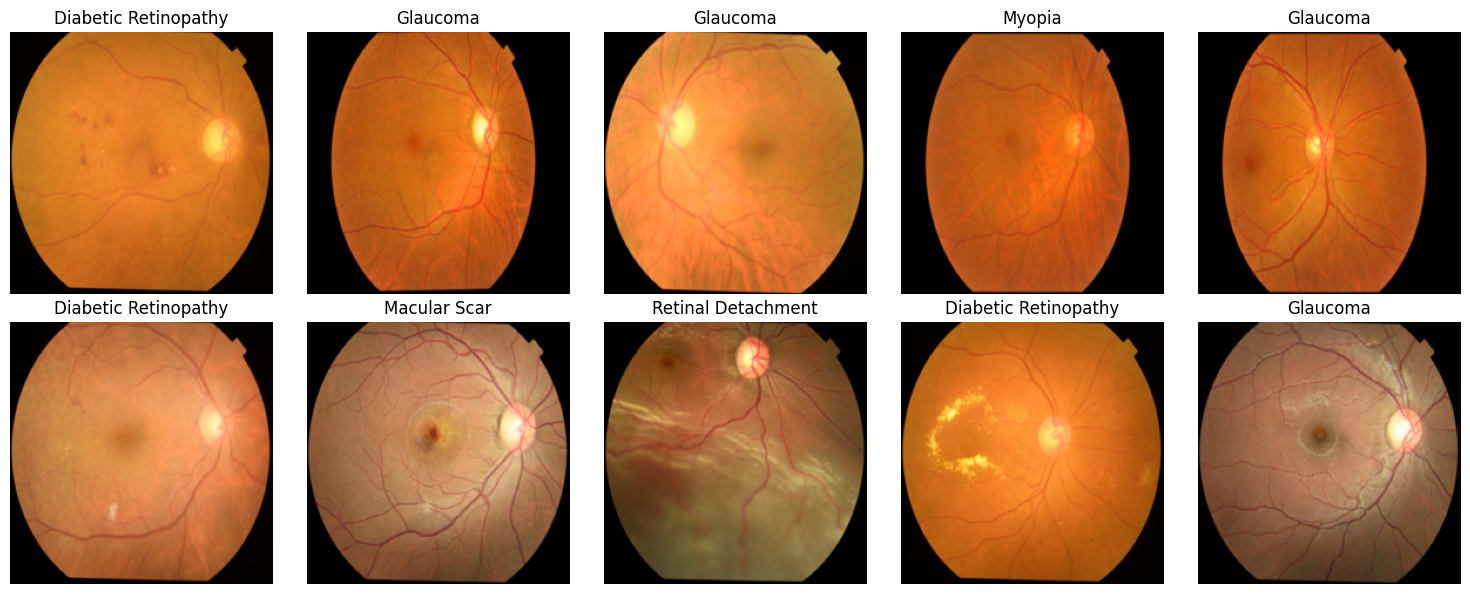

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch from the dataloader
images, targets = next(iter(dataloader))

# Function to unnormalize and show images
def imshow(img, mean=[0.485, 0.456, 0.406], 
           std=[0.229, 0.224, 0.225]):
    img = img.numpy().transpose((1, 2, 0))
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

# Show first 10 images in two rows of 5
num_images = 10
rows, cols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(num_images):
    plt.subplot(rows, cols, i+1)
    imshow(images[i])
    plt.title(classes[targets[i]])
plt.tight_layout()
plt.show()
